# Zadanie 1

In [1]:
bitstring(Float16(1/3))

"0011010101010101"

In [19]:
bitstring(Float32(1/3))

"00111110101010101010101010101011"

In [20]:
bitstring(Float64(1/3))

"0011111111010101010101010101010101010101010101010101010101010101"

In [21]:
x = Float16(1/3)
convert(Float64,x)
bitstring(x)

"0011010101010101"

# Zadanie 2

In [1]:
using Plots

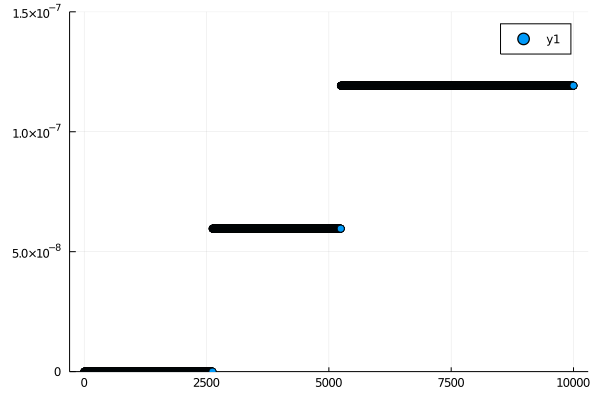

In [35]:
container = Float16[]
first = 1.0
tmp = first
last = 1000000.0
while first <= last
    push!(container, (nextfloat(first) - first)*1000)
    first = first + 100
end
scatter(container, ylims = (0,0.00000015))

z powodu błedów przy przedstawianiu tak małych wartości na wykresie, zostały one przeskalowane o 1000. Zatem wszystkie wartości na wykresie trzeba pomniejszyć jeszcze 1000 razy.

# Zadanie 3

#include <stdio.h> <br>
#include <gsl/gsl_ieee_utils.h> <br>

int main(void){<br>
&emsp;    double d = 0.3;<br>
&emsp;    while(d > 0){<br>
&emsp;&emsp;    gsl_ieee_printf_double(&d);<br>
&emsp;&emsp;    printf("\n");<br>
&emsp;&emsp;    d /= 128;<br>
&emsp;    }<br>
}<br>
<br>
Można zaobserwować, że mantysa przestaje być znormalizowana w momencie, w którym wartość cechy spada do -1024 (bitowo - same zera). Manstysa nie ma domyślnego bitu i można za jej pomocą zapisać na tyle małe liczby, że bez normalizacji byłyby zerem. <br>
wynik:

<img src="mownit_lab1_img1.JPG">

# Zadanie 4

Rozważmy problem, polegający na obliczeniu ciągu całek $y_{n} = \int_{0}^{1} \frac{x^n}{x+5}dx$ <br>
Można dowieźć, że ten ciąg jest ciągiem rekurencyjnym określonym wzorem: $y_{n} + 5y_{n-1} = \frac{1}{n}$. <br>
Pierwszy wyraz tego ciągu ma wartość: $y_{0} = \int_{0}^{1}\frac{1}{x+5}dx = ln(6) - ln(5)$. Przybliżymy ten wynik z dokładnością do 3 miejsc po przecinku: $y_{0} = 0.182$. Załóżmy że chcemy obliczyć 4 wyraz tego ciągu:

In [4]:
first = 0.182
next = first
for i = 1:4
    next = 1/i - 5*next
end
next

-0.16666666666667657

Według serwisu Wolfram Alfa, poprawny wynik wynosi 0.0343063. Więc nie dość, że uzyskaliśmy duży błąd to jeszcze wynik uzyskany powyżej jest ujemny, co nie ma sensu, gdyż funkcja podcałkowa w przedziale [0,1] jest dodatnia. <br>
Błąd jest zwiększany w momencie mnożenia czynnika $y_{n-1}$ przez 5, więc przy liczeniu 4 wyrazu błąd został zwiększony 625 razu i rośnie dalej wykładniczo.<br><br>
Aby naprawić tą sytuację, możemy spróbować pewnej sztuczki. Mając obliczony wyraz o dużym indeksie (nawet z dużym błędem), możemy na jego podstawie obliczać wyraz coraz mniejszy, a przy każdym takim obliczeniu, wartość błędu będzie się zmniejszać wykładniczo o 5. Uzyskamy w ten sposób dość dokładny wynik<br><br>
Zacznę od wyznaczenia wyrazu numer 16. Ponieważ błąd może być duży, załóżmy że wyraz  numer 15 jest równy wyrazowi numer 16.<br>
$y_{16}+5y_{16}= \frac{1}{16}$ => $y_{16} = \frac{1}{96}$ <br>
Obliczę teraz wyraz numer 4 korzystając ze wzoru rekurencyjnego od tyłu<br>
$y_{n-1} = \frac{1}{5n}-\frac{1}{5}y_{n}$

In [6]:
integral = 0.0104
for i in 16:-1:5
    integral = 1/(5*i)-1/5*integral
end
integral

0.03430632955703774

Porównując z wynikiem uzyskanym w serwisie WolframAlfa (0.0343063) można dojść do wniosku, że uzyskaliśmy znacznie lepsze przybliżenie